# Лабораторная работа №2. Дискриминантный анализ.


### 1. Подготовка библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np # поддерживает матрицы, массивы, мат.функции для них
import pandas as pd # библиотека для анализа данных
from scipy.stats import f
from scipy.spatial.distance import mahalanobis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 2. Преддискриминантный этап анализа
Целью дискриминантного анализа является разделение рассматриваемой совокупности объектов или явлений на заданные обучающими выборками классы. Исходные данные для анализа представлены в виде матрицы.

Есть два способа создания тренировочной выборки - с помощью списка TRAIN_SAMPLES или заполнение вручную стобца в Excel-файле.

In [2]:
_ = \
"""
    Что поменять:
        0) названия файлов, для считывания и для записи(этот в самом конце)
        1) FEATURES
        2) задать TRAIN_SAMPLES, если не задается, то удалить параметр из вызова функции gen_train_data
        3) задать F to enter в sda
"""

In [3]:
# В переменную FEATURES записываем названия показателей
FEATURES = ["Население","ОК(кроме 6001) Возм. не представлено (объем)","ОК(кроме 6001) Возм. не представлено (кол-во)","Расходные операции 6001(кол-во)","Приходные операции 6001(кол-во)","Расходные операции 6001","Доли выв. ДС в заруб. банки","Кол-во риск-ориентировок запросы","Кол-во проверок","КВО 4005 Всего (объем)","КВО 4005 Всего (кол-во)","ВК (6001) Всего (объем)","ВК (6001) Всего (кол-во)","Приходные операции 6001","05 Доли сомнительных операций","Общий объем опер.90дн.","Общее кол-во опер.90дн.","ВК (6001) Всего (объем)90дн.","Общий объем опер.30дн.","ВК (6001) Всего (кол-во)90дн.","Общее кол-во опер.30дн.","09 Доли возм. не представленных сообщений","08 Доли кол-во КВО 5007 возм. не предст. сообщений","КВО 5007 Всего (кол-во)","КВО 5007 Всего (объем)","КВО 5007 Возм. не представлено (объем)","07 Доли объема возм. не предст. сообщений по ВК","КВО 5007 Возм. не представлено (кол-во)","06 Доли объема возм. не предст. сообщений по ОК","03 Доли выв. ДС в заруб. банки(без оффш.)","04 Доли выв. ДС в оффшор. банки","02 Доли опер. обналич","01 Доли опер. с фиктивными","КВО 4007 Всего (кол-во)","КВО 4007 Всего (объем)","КВО 4007 Возм. не представлено (объем)","КВО 4007 Возм. не представлено (кол-во)","ВК(6001) Возм. не представлено (объем)","ВК(6001) Возм. не представлено (кол-во)","Сообщения объем 4077 (3041)","Сообщения кол-во 4077 (3041)","Приход/расход 6001","Приход/расход","Снятие наличных денежных средств","Сомнительные операции","Перечисления со счетов оффшорных банков","Перечисления со счетов зарубежных банков","Перечисления на счета в оффшорных банках","Перечисления на счета в зарубежных банках(без оффш.)","Перечисления на счета в зарубежных банках","Операции с организациями, имеющими признаки фиктивности(кол-во)","Операции с организациями, имеющими признаки фиктивности","Общий объем операций 6001","ВК(6001) Всего (кол-во)","ВК(6001) Всего (объем)","Общий объем операций (руб.)","Общее кол-во операций 6001","Общее кол-во операций","Обороты за отчетный период по кредиту «итого», тыс.руб.;счета Депо – в штуках","Сотня по активам","Общий объем операций с бюдж. орг.","Обороты за отчетный период по дебету «итого», тыс.руб.;счета Депо – в штуках","Кол-во юр. лиц","Кол-во фиктивности  юр. лиц","Кол-во физ. лиц","Кол-во получ. бюджетных средств","Кол-во не опоз. юл/фл","Кол-во клиентов-нерезидентов","Доли фиктивности  юр. лиц","Кол-во клиентов есть счет","Кол-во клиентов","Доли клиентов физ. лиц","Доли клиентов юр. лиц","Доли  клиентов-нерезидентов"] 


In [4]:
data = pd.read_excel("C:\Jypiter\Dannye_UIR.xlsx",0)
data.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов,Train sample
КО1,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462,0.0
КО2,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011,0.0
КО3,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,1.0
КО4,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764,1.0
КО5,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000,1.0


Создаем новую переменную, в которую будем записывать все данные, которые необходимо включить в итоговый Excel-файл.

In [5]:
data_to_excel = data[FEATURES]

Далее, вводим функцию gen_train_data по созданию тренировочной выборки.
<br>Аргументы функции: 
- data - данные для анализа
- features - названия признаков 
- train_samples - опциональный параметр: если он передан, то разбиение классов обучающей выборкой задается при помощи train_samples (1 часть ЛР), в противном случае разбиение должно присутствовать в одном из столбцов data (2 часть ЛР)

In [6]:
def gen_train_data(data, features, train_samples=None):
    if train_samples: # если опциональный параметр задан
        train_data = pd.DataFrame() # создаем тренировочную выборку, пока пустую
        for cls, samples in train_samples.items(): # в cls записываем номера классов, в samples список объектов этого класса
            train_samps = data[features].loc[samples] # выбираем объекты обучающей выборки
            train_samps["Class"] = cls # добавляем к ним колонку с номером класса
            train_data = pd.concat([train_data, train_samps]) # concat - функция объединения таблиц
    else:
        assert data.shape[1] == len(features) + 1 # если в исходном файле нет доп.колонки с разбиением, выдаст ошибку
        train_data = data.dropna() # берем в тренировочную выборку только те строки, где проставлены классы
        cls_col = train_data.drop(columns=features).columns[0] 
        train_data = train_data.rename({cls_col: "Class"}, axis=1) # переименовываем колонку с обучающей выборкой на  "Class"
    train_data = train_data.astype({"Class": 'int32'}) # присваем колонке "Class" тип int
    return train_data

In [7]:
# если классы заданы в файле - TRAIN_SAMPLES надо удалить
train_data = gen_train_data(data, FEATURES)
train_data.head(5) # смотрим результаты работы функции gen_train_data

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов,Class
КО1,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462,0
КО2,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011,0
КО3,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,1
КО4,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764,1
КО5,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000,1


Добавим столбец с обучающей выборкой в переменную.

In [8]:
data_to_excel["Train sample"] = train_data.Class

Для расчета Лямбды Уилкса необходимо знать: <br>
1) общая матрица рассеяния: 
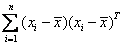

2) внутриклассовые матрицы разброса
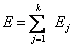

где 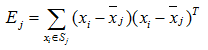

In [9]:
# проведем расчет матрицы рассеяния 

def scatter_matrix(samples):
    if isinstance(samples, pd.Series):
        samples = samples.to_frame()
    d = samples - samples.mean()
    res = np.zeros((d.shape[1], d.shape[1]))
    for _, row in d.iterrows():
        col = row.to_frame()
        res += np.dot(col,col.T)
    return res

In [10]:
# проведем расчет внутриклассовых матриц разброса

def classes_scatter_matrix(samples, labels):
    A = np.zeros((samples.shape[1], samples.shape[1]))
    for cls in labels.unique():
        A += scatter_matrix(samples[labels == cls])
    return A

Рассчитаем ковариационную матрицу:

In [11]:
# выведем ковариационную матрицу
# она рассчитывается как классовая матрица рассеяния "classes_scatter_matrix", деленная на (кол-во объектов - кол-во классов)

cov = pd.DataFrame(
    classes_scatter_matrix(train_data[FEATURES], train_data.Class) / (train_data.shape[0] - train_data.Class.unique().size), 
    index=FEATURES, 
    columns=FEATURES
)

cov

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
Население,2.425703e+13,9.305890e+16,7.214228e+09,1.067249e+10,1.215025e+10,1.485568e+16,-3.031270e+05,-2.133238e+05,-3.259940e+04,1.239772e+16,...,3.898689e+09,9.377557e+07,3.098450e+07,8.076353e+07,7.182264e+06,1.212677e+10,1.437940e+10,-1.248607e+07,-1.635001e+07,1.294921e+06
ОК(кроме 6001) Возм. не представлено (объем),9.305890e+16,3.989217e+22,2.987664e+15,4.483381e+15,5.477631e+15,6.331765e+21,1.415893e+10,-2.090029e+09,6.665837e+10,5.505311e+21,...,1.838038e+15,5.111808e+13,1.387741e+13,2.718757e+13,-9.741897e+09,5.544735e+15,6.914495e+15,1.063741e+11,-2.943412e+10,-8.967476e+09
ОК(кроме 6001) Возм. не представлено (кол-во),7.214228e+09,2.987664e+15,2.544566e+08,3.934418e+08,4.783012e+08,5.381963e+14,4.206310e+02,-1.823392e+02,5.579269e+03,4.709132e+14,...,1.631880e+08,4.289900e+06,1.189210e+06,2.333388e+06,6.000190e+02,4.875678e+08,6.085185e+08,1.282728e+04,-3.327420e+03,-1.264882e+03
Расходные операции 6001(кол-во),1.067249e+10,4.483381e+15,3.934418e+08,6.480386e+08,7.852971e+08,8.671339e+14,4.794034e+01,1.982908e+01,8.464361e+03,7.386318e+14,...,2.623855e+08,6.647737e+06,1.919708e+06,3.733258e+06,7.170415e+03,7.738544e+08,9.678473e+08,2.476911e+04,-9.694383e+03,-2.066982e+03
Приходные операции 6001(кол-во),1.215025e+10,5.477631e+15,4.783012e+08,7.852971e+08,9.616418e+08,1.057399e+15,1.731083e+02,-8.892429e+01,1.046855e+04,9.022660e+14,...,3.231888e+08,8.206280e+06,2.361918e+06,4.576382e+06,4.887586e+03,9.481488e+08,1.187317e+09,3.290892e+04,-1.947514e+04,-2.063907e+03
Расходные операции 6001,1.485568e+16,6.331765e+21,5.381963e+14,8.671339e+14,1.057399e+15,1.183317e+21,1.324472e+09,1.041711e+07,1.183712e+10,1.008468e+21,...,3.548036e+14,9.191707e+12,2.605018e+12,5.058248e+12,1.206216e+10,1.049938e+15,1.313722e+15,2.765968e+10,9.566594e+08,-2.606582e+09
Доли выв. ДС в заруб. банки,-3.031270e+05,1.415893e+10,4.206310e+02,4.794034e+01,1.731083e+02,1.324472e+09,6.199244e+01,1.774378e-01,2.247195e-03,8.025026e+08,...,-1.852613e+01,5.895519e+00,1.300148e+00,2.044179e+01,8.483933e+00,1.366492e+02,2.306241e+02,-3.812687e-03,4.010788e+01,1.373042e+01
Кол-во риск-ориентировок запросы,-2.133238e+05,-2.090029e+09,-1.823392e+02,1.982908e+01,-8.892429e+01,1.041711e+07,1.774378e-01,2.442551e-01,2.977565e-02,-2.693689e+08,...,-1.180467e+02,-4.006426e+00,-8.652484e-01,-8.789109e-01,1.494430e+00,-3.483694e+02,-4.196311e+02,-1.659396e-01,4.156397e+00,-1.081548e-03
Кол-во проверок,-3.259940e+04,6.665837e+10,5.579269e+03,8.464361e+03,1.046855e+04,1.183712e+10,2.247195e-03,2.977565e-02,4.333658e-01,1.037532e+10,...,3.689731e+03,9.955921e+01,2.678620e+01,5.413252e+01,9.423106e-01,1.091545e+04,1.356504e+04,1.198529e+00,4.186557e+00,1.264405e-01
КВО 4005 Всего (объем),1.239772e+16,5.505311e+21,4.709132e+14,7.386318e+14,9.022660e+14,1.008468e+21,8.025026e+08,-2.693689e+08,1.037532e+10,8.854619e+20,...,3.085987e+14,7.968068e+12,2.244441e+12,4.415986e+12,2.122355e+09,9.130354e+14,1.140752e+15,2.505309e+10,-8.820439e+09,-1.984645e+09


Для проведения дискриминантного анализа используем возможности класса LinearDiscriminantAnalysis.

In [12]:
# "обучаем" модель с помощью метода fit класса LinearDiscriminantAnalysis 
# в метод fit передаем исходные данные
lda = LinearDiscriminantAnalysis().fit(train_data[FEATURES], train_data.Class)

C:\Programs\Anaconda\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Рассчитаем оценки математических ожиданий в классах.

In [13]:
# выведем средние значения параметров для каждого класса обучающей выборки
means = pd.DataFrame(lda.means_, index=lda.classes_, columns=FEATURES)
means

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
0,6.628143e+06,4.777936e+10,4167.934109,6521.375969,6979.468992,8.643695e+09,1.276882,0.263566,0.414729,7.033371e+09,...,2156.054264,60.697674,17.596899,44.666667,8.016670,7133.554264,8495.302326,19.322830,79.424602,1.541789
1,7.945817e+06,1.438613e+09,221.772532,341.263948,269.040773,7.504152e+08,1.371190,0.128755,0.171674,3.769237e+08,...,85.233906,1.469957,0.568670,3.137339,5.581584,353.517167,441.051502,14.384068,40.539155,0.673251


### 3.	Дискриминантный анализ

Определим линейные дискриминантные функции Фишера.
Зададим функцию вывода коэффициентов функции Фишера.

In [14]:
def get_df_coef(lda, features):
    if lda.classes_.size == 2: #если 2 класса, то lda вернет разность коэффициентов функций
        return pd.DataFrame(
            np.concatenate([lda.intercept_, lda.coef_.ravel()]),
            index=["Intercept"] + features,
            columns=["Discriminant F"]
        )
# если 3 и более классов, то lda вернет несколько функций (аналогично ППП Statistica)
    return pd.DataFrame(
        np.vstack([lda.intercept_, lda.coef_.T]),
        index=["Intercept"] + features,
        columns=lda.classes_
    )

In [15]:
df_coef = get_df_coef(lda, FEATURES) # применим эту функцию для наших параметров
df_coef

,Discriminant F
Intercept,3.899755e+00
Население,6.113508e-08
ОК(кроме 6001) Возм. не представлено (объем),2.103348e-11
ОК(кроме 6001) Возм. не представлено (кол-во),-6.233431e-04
Расходные операции 6001(кол-во),-5.242954e-04
Приходные операции 6001(кол-во),-1.475826e-03
Расходные операции 6001,-1.066918e-09
Доли выв. ДС в заруб. банки,5.467544e-02
Кол-во риск-ориентировок запросы,4.578240e-01
Кол-во проверок,1.049589e+00


Зададим функцию расчета квадратов расстояний Махаланобиса между классами, где:
 - centers - центры классов
 - samples - объекты, для которых считаем расстояния
 - cov - ковариационная матрицы

In [16]:
def calc_mahalanobis_square_dist(centers, samples, cov):
    # создаем матрицу расстояний между классами и объекnами
    res = pd.DataFrame(index=samples.index, columns=centers.index)
    for i in centers.index: # проходим по всем центрам классов
        for j in samples.index: # проходим по всем объектам
            # считаем расстояние между текущим классом и объектом
            res[i][j] = mahalanobis(centers.loc[i], samples.loc[j], np.linalg.inv(cov)) ** 2 
    res.head(10)        
    return res

In [17]:
# выведем квадраты расстояний Махаланобиса между классами
center_distance = calc_mahalanobis_square_dist(means, means, cov)
center_distance

,0,1
0,0,5.58864
1,5.58864,0


Выведем оценки априорных вероятностей:

In [18]:
lda.priors_ 

array([0.35635359, 0.64364641])

Далее, определим функцию вывода номеров классов для переданных X:

In [19]:
def LDA_predict(lda, X):
    return pd.DataFrame(
        lda.predict(X),
        columns=["Class"],
        index=X.index
    )

Поведем повторную классификацию объектов тренировочной выборки:

In [20]:
lda_predict_train = LDA_predict(lda, train_data[FEATURES])
# сравниваем полученные классы с теми, которые были заданы в начале, и смотрим долю совпадения
(lda_predict_train.Class == train_data.Class).value_counts(normalize=True)

True     0.854972
False    0.145028
Name: Class, dtype: float64

Получим полную картину классификации всех объектов:

In [21]:
lda_predict = LDA_predict(lda, data[FEATURES])
lda_predict.head

<bound method NDFrame.head of         Class
КО1         0
КО2         0
КО3         1
КО4         0
КО5         1
КО6         0
КО7         0
КО8         1
КО9         0
КО10        0
КО11        1
КО12        1
КО13        0
КО14        0
КО15        1
КО16        0
КО17        1
КО18        0
КО19        1
КО20        0
КО21        1
КО22        1
КО23        0
КО24        1
КО25        0
КО26        1
КО27        1
КО28        1
КО29        1
КО30        1
...       ...
КО1445      0
КО1446      0
КО1447      1
КО1448      0
КО1449      1
КО1450      1
КО1451      1
КО1452      1
КО1453      0
КО1454      1
КО1455      1
КО1456      0
КО1457      1
КО1458      1
КО1459      1
КО1460      1
КО1461      1
КО1462      1
КО1463      1
КО1464      1
КО1465      0
КО1466      0
КО1467      1
КО1468      1
КО1469      1
КО1470      1
КО1471      1
КО1472      1
КО1473      1
КО1474      1

[1474 rows x 1 columns]>

Запишем результаты классификации в переменную.

In [22]:
data_to_excel["Results lda"] = lda_predict

Выведем квадраты расстояний Махаланобиса между классами и объектами:

In [23]:
samp_dist = calc_mahalanobis_square_dist(means, data[FEATURES], cov)
samp_dist.head()

,0,1
КО1,696.929,710.485
КО2,13.5764,22.3203
КО3,12.7981,2.44326
КО4,16.3832,19.9105
КО5,18.2228,8.37825


In [24]:
data_to_excel = pd.concat([data_to_excel, samp_dist.add_prefix("lda mahalanobis ")], axis=1)

Зададим функцию для вывода апостериорных вероятностей:

In [25]:
def LDA_predict_proba(lda, X):
    return pd.DataFrame(
        lda.predict_proba(X),
        columns=lda.classes_,
        index=X.index
    )

Применим функцию LDA_predict_proba для наших данных:

In [26]:
lda_post_prob = LDA_predict_proba(lda, data[FEATURES])
lda_post_prob.head()

,0,1
КО1,0.995248,0.004752
КО2,0.969755,0.030245
КО3,0.009476,0.990524
КО4,0.902004,0.097996
КО5,0.012249,0.987751


In [27]:
data_to_excel = pd.concat([data_to_excel, lda_post_prob.add_prefix("lda post prob ")], axis=1)

### 4.	Пошаговый дискриминантный анализ

Зададим функцию расчета Лямбды Уилкса:

In [28]:
def wilks_lambda(samples, labels):
    if isinstance(samples, pd.Series):
        samples = samples.to_frame()
    dT = np.linalg.det(scatter_matrix(samples)) # расчет определителя матрицы рассеяния
    dE = np.linalg.det(classes_scatter_matrix(samples, labels)) # расчет определителя матрицы классового рассеяния
    return dE / dT # их частное и есть Лямбда Уилкса

Зададим функцию расчета f value и p value :
- lmbda - Лямбда Уилкса
- n_obs - кол-во объектов
- n_var - кол-во признаков
- n_cls - кол-во классов

In [29]:
def f_value_wilks_lambda(lmbda, n_obs, n_var, n_cls):
    num = (1 - lmbda) * (n_obs - n_cls - n_var)
    den = lmbda * (n_cls - 1)
    f_value = num / den #значение статистики Фишера
    # f.sf считает p value для определенного значения статистики Фишера и заданных степеней свободы
    p_value = f.sf(f_value, n_cls - 1, n_obs - n_cls - n_var) 
    return f_value, p_value

sda - функция для проведения пошагового дискриминантного анализа:
 - samples - набор объектов
 - labels - названия классов
 - F_in=1e-4 - установленное нами значение F_to_Enter
Функция выводит для каждого шага переменные в модели(into) и вне модели(out) и их характеристики.

In [30]:
def sda(samples, labels, F_in=1):
    stat_columns = ["Wilk's lambda", "Partial lambda", "F to enter", "p-value"]
    n_cls = labels.unique().size # количество классов
    n_obs = samples.shape[0] # количество объектов
    
    # словари для вывода переменных в модели и вне модели на каждом шаге
    out = {0: pd.DataFrame(columns=stat_columns, index=samples.columns, dtype=float)} 
    into = {0: pd.DataFrame(columns=stat_columns, dtype=float)}
    
    step = 0
    while True:
        model_lambda = wilks_lambda(samples[into[step].index], labels) #посчитали Лямбду Уилкса для модели на данном шаге
        
        for x in out[step].index: # проходим по переменным вне модели на данном шаге
        # далее рассчитываем характеристики для данных переменных и записываем их в таблицу    
            lmbda = wilks_lambda(samples[into[step].index.tolist() + [x]], labels) 
            partial_lambda = lmbda / model_lambda
            f_lambda, p_value = f_value_wilks_lambda(partial_lambda, n_obs, into[step].index.size, n_cls)
            out[step].loc[x] = lmbda, partial_lambda, f_lambda, p_value 
            
        for x in into[step].index: # проходим по переменным в модели на данном шаге
        # далее рассчитываем характеристики для данных переменных и записываем их в таблицу  
            lmbda = wilks_lambda(samples[into[step].index.drop(x)], labels)
            partial_lambda = model_lambda / lmbda
            f_lambda, p_value = f_value_wilks_lambda(partial_lambda, n_obs, into[step].index.size - 1, n_cls)
            into[step].loc[x] = lmbda, partial_lambda, f_lambda, p_value
            
        # критерий для остановки цикла 
        # если вне модели нет переменных ИЛИ новая переменная обладает f_to_enter меньше порогового значения, цикл остановлен
        if out[step].index.size == 0 or out[step]["F to enter"].max() < F_in:
            break
        
        # ищем элемент с max f_to_enter
        x_to_enter = out[step]["F to enter"].idxmax()
        # переносим его из элементов "вне модели" в элементы "в модели"
        into[step + 1] = into[step].append(out[step].loc[x_to_enter])
        out[step + 1] = out[step].drop(index=x_to_enter)
        
        step += 1 # переходим к следующему шагу
        
    return into, out 

Вызываем результаты работы заданной выше функции:

In [31]:
into, out = sda(train_data[FEATURES], train_data.Class, 2.2)

Выводим результаты работы для переменных "в модели" на экран:

In [32]:
for i, t in into.items():
    print("Step ", i)
    print(t, end="\n\n")

Step  0
Empty DataFrame
Columns: [Wilk's lambda, Partial lambda, F to enter, p-value]
Index: []

Step  1
                                                 Wilk's lambda  \
07 Доли объема возм. не предст. сообщений по ВК            1.0   

                                                 Partial lambda  F to enter  \
07 Доли объема возм. не предст. сообщений по ВК        0.633125  418.375313   

                                                      p-value  
07 Доли объема возм. не предст. сообщений по ВК  1.063905e-73  

Step  2
                                                 Wilk's lambda  \
07 Доли объема возм. не предст. сообщений по ВК       0.986465   
Доли фиктивности  юр. лиц                             0.633125   

                                                 Partial lambda  F to enter  \
07 Доли объема возм. не предст. сообщений по ВК        0.593795  493.223135   
Доли фиктивности  юр. лиц                              0.925186   58.302777   

                             

Выводим результаты работы для переменных "вне модели" на экран:

In [33]:
for i, t in out.items():
    print("Step ", i)
    print(t, end="\n\n")

Step  0
                                                    Wilk's lambda  \
Население                                                0.983804   
ОК(кроме 6001) Возм. не представлено (объем)             0.987770   
ОК(кроме 6001) Возм. не представлено (кол-во)            0.986120   
Расходные операции 6001(кол-во)                          0.986626   
Приходные операции 6001(кол-во)                          0.989345   
Расходные операции 6001                                  0.988035   
Доли выв. ДС в заруб. банки                              0.999967   
Кол-во риск-ориентировок запросы                         0.983175   
Кол-во проверок                                          0.969600   
КВО 4005 Всего (объем)                                   0.988622   
КВО 4005 Всего (кол-во)                                  0.990979   
ВК (6001) Всего (объем)                                  0.991359   
ВК (6001) Всего (кол-во)                                 0.994689   
Приходные операции 6001   

Выводим названия признаков в модели:

In [34]:
stepwise_features = into[len(into) - 2].index.tolist()
stepwise_features

['07 Доли объема возм. не предст. сообщений по ВК',
 'Доли фиктивности  юр. лиц',
 'Перечисления со счетов оффшорных банков',
 'Доли клиентов юр. лиц',
 'Кол-во проверок',
 'КВО 5007 Возм. не представлено (объем)',
 '06 Доли объема возм. не предст. сообщений по ОК',
 '09 Доли возм. не представленных сообщений',
 '05 Доли сомнительных операций',
 'Доли  клиентов-нерезидентов',
 'Население',
 '04 Доли выв. ДС в оффшор. банки',
 '01 Доли опер. с фиктивными',
 'Сотня по активам',
 'ВК (6001) Всего (кол-во)90дн.',
 'ВК (6001) Всего (кол-во)',
 'Кол-во получ. бюджетных средств',
 'ОК(кроме 6001) Возм. не представлено (кол-во)',
 'Операции с организациями, имеющими признаки фиктивности(кол-во)',
 'ВК(6001) Возм. не представлено (объем)',
 'Кол-во фиктивности  юр. лиц']

Проводим дискриминантный анализ для отобранных признаков.

In [35]:
stepwise_lda = LinearDiscriminantAnalysis().fit(train_data[stepwise_features], train_data.Class)

 Выводим коэффициенты функции Фишера на экран.

In [36]:
stepwise_df_coef = get_df_coef(stepwise_lda, stepwise_features)
stepwise_df_coef

,Discriminant F
Intercept,3.630210e+00
07 Доли объема возм. не предст. сообщений по ВК,-5.773669e-02
Доли фиктивности юр. лиц,7.593347e-02
Перечисления со счетов оффшорных банков,-2.159528e-10
Доли клиентов юр. лиц,-7.534992e-03
Кол-во проверок,7.457834e-01
КВО 5007 Возм. не представлено (объем),-1.130908e-09
06 Доли объема возм. не предст. сообщений по ОК,-3.872615e-02
09 Доли возм. не представленных сообщений,4.721257e+00
05 Доли сомнительных операций,2.751031e-02


Пполучим полную картину классификации всех объектов.

In [37]:
stepwise_lda_predict = LDA_predict(stepwise_lda, data[stepwise_features])
stepwise_lda_predict.head()

,Class
КО1,0
КО2,0
КО3,1
КО4,0
КО5,1


Запишем результаты классификации в переменную.

In [38]:
data_to_excel["Results stepwise lda"] = stepwise_lda_predict

In [39]:
stepwise_cov = classes_scatter_matrix(train_data[stepwise_features], train_data.Class) \
    / (train_data.shape[0] - train_data.Class.unique().size)

stepwise_means = pd.DataFrame(stepwise_lda.means_, index=stepwise_lda.classes_, columns=stepwise_features)

stepwise_samp_dist = calc_mahalanobis_square_dist(stepwise_means, data[stepwise_features], stepwise_cov)
stepwise_samp_dist.head()

,0,1
КО1,83.068,86.0413
КО2,9.52124,16.1892
КО3,9.10543,2.01951
КО4,8.55379,13.9297
КО5,10.853,4.70896


In [40]:
data_to_excel = pd.concat([data_to_excel, stepwise_samp_dist.add_prefix("stepwise lda mahalanobis ")], axis=1)

In [41]:
stepwise_lda_post_prob = LDA_predict_proba(stepwise_lda, data[stepwise_features])
stepwise_lda_post_prob.head()

,0,1
КО1,0.710005,0.289995
КО2,0.939503,0.060497
КО3,0.015763,0.984237
КО4,0.890585,0.109415
КО5,0.025008,0.974992


In [42]:
data_to_excel = pd.concat([data_to_excel, stepwise_lda_post_prob.add_prefix("stepwise lda post prob ")], axis=1)
data_to_excel.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Results lda,lda mahalanobis 0,lda mahalanobis 1,lda post prob 0,lda post prob 1,Results stepwise lda,stepwise lda mahalanobis 0,stepwise lda mahalanobis 1,stepwise lda post prob 0,stepwise lda post prob 1
КО1,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,0,696.929,710.485,0.995248,0.004752,0,83.068,86.0413,0.710005,0.289995
КО2,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,0,13.5764,22.3203,0.969755,0.030245,0,9.52124,16.1892,0.939503,0.060497
КО3,12263861,0,0,0,0,0,0.000000,0,0,0,...,1,12.7981,2.44326,0.009476,0.990524,1,9.10543,2.01951,0.015763,0.984237
КО4,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,0,16.3832,19.9105,0.902004,0.097996,0,8.55379,13.9297,0.890585,0.109415
КО5,12263861,0,0,0,0,0,0.000000,0,0,0,...,1,18.2228,8.37825,0.012249,0.987751,1,10.853,4.70896,0.025008,0.974992


Записываем результаты проведенной работы в файл.

In [43]:
data_to_excel.to_excel("лр21.xlsx")